In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from tqdm import tqdm
import sys

sys.path.append(os.path.abspath(".."))

from amp_experiment import generate_data
from amp import AMP_algo
from state_evolution import generate_latents

In [3]:
# Nice plots with LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [4]:
def pca_eigenvector_first_two(X):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    first_eigenvectors = Vt[:2, :].T
    return first_eigenvectors

In [5]:
def pca_overlap(alpha, beta_u, beta_v, n_trials=200, d=100, gamma = 0.0, delta = 0.0):
    overlaps = []
    for i in tqdm(range(n_trials)):
        X, y, u_star, v_star = generate_data(n=int(alpha*d), d=d, beta_u=beta_u, beta_v=beta_v, gamma = gamma, delta = delta)
        UV = np.vstack([u_star.T, v_star.T])/np.sqrt(d)  # shape: (2, d)
        v_hat = pca_eigenvector_first_two(X)/np.linalg.norm(pca_eigenvector_first_two(X), axis=0, keepdims=True)
        overlaps_value = np.abs(UV @ v_hat)
        max_overlap_u = np.max(overlaps_value[0])
        max_overlap_v = np.max(overlaps_value[1])
        overlaps.append((max_overlap_u, max_overlap_v))
    overlaps = np.array(overlaps)
    return overlaps


In [6]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 100
gamma = 0.0
delta = 1.0
overlaps_means = []
overlaps_stds = []
for alpha in tqdm(alpha_values):
    overlaps = pca_overlap(alpha, beta_u, beta_v, n_trials=5, d=d, gamma=gamma, delta=delta)
    overlaps_means.append(np.mean(overlaps, axis=0))
    overlaps_stds.append(np.std(overlaps, axis=0))

100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


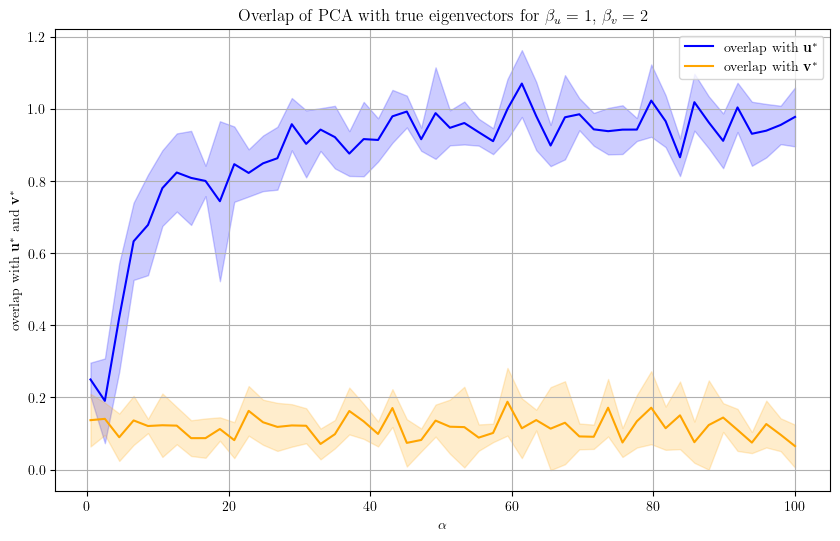

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, np.array(overlaps_means)[:, 0], label=r'overlap with $\mathbf{u^*}$', color='blue')
plt.fill_between(alpha_values, 
                 np.array(overlaps_means)[:, 0] - np.array(overlaps_stds)[:, 0], 
                 np.array(overlaps_means)[:, 0] + np.array(overlaps_stds)[:, 0], 
                 color='blue', alpha=0.2)
plt.plot(alpha_values, np.array(overlaps_means)[:, 1], label=r'overlap with $\mathbf{v^*}$', color='orange')
plt.fill_between(alpha_values, 
                 np.array(overlaps_means)[:, 1] - np.array(overlaps_stds)[:, 1], 
                 np.array(overlaps_means)[:, 1] + np.array(overlaps_stds)[:, 1], 
                 color='orange', alpha=0.2)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'overlap with $\mathbf{u^*}$ and $\mathbf{v^*}$')
plt.title(r'Overlap of PCA with true eigenvectors for $\beta_u = 1$, $\beta_v = 2$')
plt.legend()
plt.grid()
plt.show()

Correlated

In [16]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 100
overlaps_means_corr = []
overlaps_stds_corr = []
for alpha in tqdm(alpha_values):
    overlaps = pca_overlap(alpha, beta_u, beta_v, n_trials=5, d=d, correlated=True)
    overlaps_means_corr.append(np.mean(overlaps, axis=0))
    overlaps_stds_corr.append(np.std(overlaps, axis=0))

100%|██████████| 50/50 [00:30<00:00,  1.61it/s]


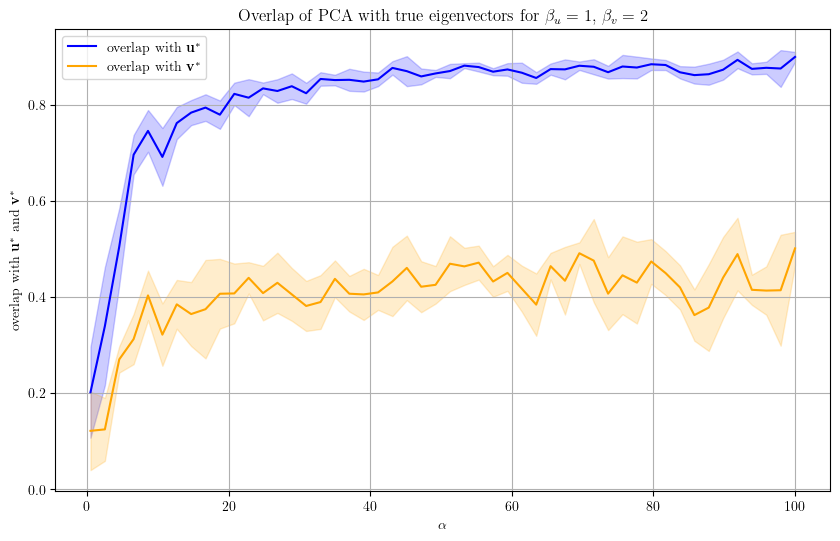

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, np.array(overlaps_means_corr)[:, 0], label=r'overlap with $\mathbf{u^*}$', color='blue')
plt.fill_between(alpha_values, 
                 np.array(overlaps_means_corr)[:, 0] - np.array(overlaps_stds_corr)[:, 0], 
                 np.array(overlaps_means_corr)[:, 0] + np.array(overlaps_stds_corr)[:, 0], 
                 color='blue', alpha=0.2)
plt.plot(alpha_values, np.array(overlaps_means_corr)[:, 1], label=r'overlap with $\mathbf{v^*}$', color='orange')
plt.fill_between(alpha_values, 
                 np.array(overlaps_means_corr)[:, 1] - np.array(overlaps_stds_corr)[:, 1], 
                 np.array(overlaps_means_corr)[:, 1] + np.array(overlaps_stds_corr)[:, 1], 
                 color='orange', alpha=0.2)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'overlap with $\mathbf{u^*}$ and $\mathbf{v^*}$')
plt.title(r'Overlap of PCA with true eigenvectors for $\beta_u = 1$, $\beta_v = 2$')
plt.legend()
plt.grid()
plt.show()

# Same but now d = 1000

In [20]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 1000
overlaps_means = []
overlaps_stds = []
for alpha in tqdm(alpha_values):
    overlaps = pca_overlap(alpha, beta_u, beta_v, n_trials=5, d=d)
    overlaps_means.append(np.mean(overlaps, axis=0))
    overlaps_stds.append(np.std(overlaps, axis=0))

 90%|█████████ | 45/50 [1:01:23<06:49, 81.86s/it] 


KeyboardInterrupt: 

In [ ]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 1000
overlaps_means_corr = []
overlaps_stds_corr = []
for alpha in tqdm(alpha_values):
    overlaps = pca_overlap(alpha, beta_u, beta_v, n_trials=5, d=d, correlated=True)
    overlaps_means_corr.append(np.mean(overlaps, axis=0))
    overlaps_stds_corr.append(np.std(overlaps, axis=0))

## ICA

In [84]:
def fastica_1d(X, max_iter=1000, tol=1e-6):
    n, d = X.shape


    # Center the data (zero mean)
    X_centered = X - np.mean(X, axis=0)
    
    # Compute covariance matrix
    cov = np.cov(X_centered, rowvar=False)

    # Eigenvalue decomposition
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Regularize to avoid division by zero
    eigvals[eigvals < 1e-10] = 1e-10

    # Whitening transformation
    whitening_matrix = eigvecs @ np.diag(1.0 / np.sqrt(eigvals)) @ eigvecs.T
    X_whitened = X_centered @ whitening_matrix

    w = np.random.randn(d)
    w /= np.linalg.norm(w)

    for _ in range(max_iter):
        w_old = w.copy()
        proj = X_whitened @ w
        #w = (X_whitened.T @ np.tanh(proj)) / n - np.mean(1 - np.tanh(proj)**2) * w
        w = (X_whitened.T @ (proj**3)) / n - 3 * w
        w /= np.linalg.norm(w)

        if np.abs(np.abs(np.dot(w, w_old)) - 1) < tol:
            break

    return w

def fast_ica_overlap(alpha, beta_u, beta_v, n_trials=200, d=100, correlated=False):
    overlaps = []
    for i in tqdm(range(n_trials)):
        if correlated:
            X, y, u_star, v_star = generate_data_corr(d=d, n=int(alpha*d), beta_u=beta_u, beta_v=beta_v)
        else:
            X, y, u_star, v_star = generate_data(d=d, n=int(alpha*d), beta_u=beta_u, beta_v=beta_v)
        
        X_structure = X[y.flatten() == 1]
        UV = np.vstack([u_star.T, v_star.T])/np.sqrt(d)  # shape: (2, d)
        v_hat = fastica_1d(X_structure) # shape (d,)
        v_hat /= np.linalg.norm(v_hat)
        overlaps_value = np.abs(UV @ v_hat)
        overlaps.append(overlaps_value)
    overlaps = np.array(overlaps)
    return overlaps

100%|██████████| 50/50 [02:02<00:00,  2.45s/it]


Plot saved as figures_uncorrelated/sim_overlap_ica_beta_u_1_beta_v_2_d_100.png


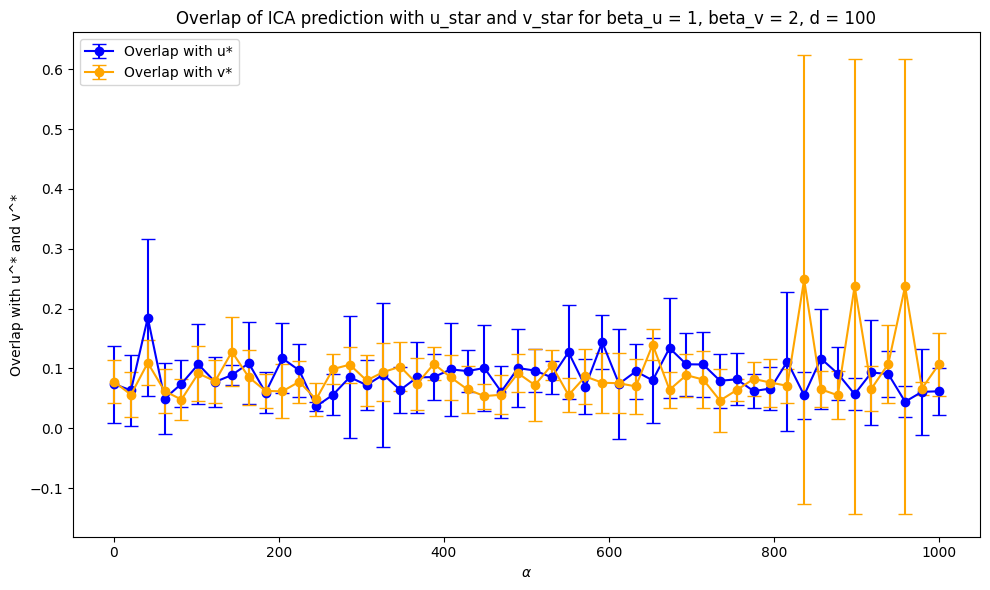

In [86]:
alpha_values = np.linspace(0.5, 1000, 50)
beta_u = 1
beta_v = 2
d = 100
overlaps_means = []
overlaps_stds = []
for alpha in tqdm(alpha_values):
    overlaps = fast_ica_overlap(alpha, beta_u, beta_v, n_trials=5, d=d)
    overlaps_means.append(np.mean(overlaps, axis=0))
    overlaps_stds.append(np.std(overlaps, axis=0))

plt.figure(figsize=(10, 6))
plt.errorbar(alpha_values, 
             [mean[0] for mean in overlaps_means],
             yerr=[std[0] for std in overlaps_stds],
             label='Overlap with u*',
             fmt='o-', color='blue', capsize=5)
plt.errorbar(alpha_values, 
             [mean[1] for mean in overlaps_means],
             yerr=[std[1] for std in overlaps_stds],
             label='Overlap with v*',
             fmt='o-', color='orange', capsize=5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Overlap with u^* and v^*')
plt.title(f'Overlap of ICA prediction with u_star and v_star for beta_u = {beta_u}, beta_v = {beta_v}, d = {d}')
plt.legend()
plt.tight_layout()
plotname = f'figures_uncorrelated/sim_overlap_ica_beta_u_{beta_u}_beta_v_{beta_v}_d_{d}.png'
plt.savefig(plotname)
print(f"Plot saved as {plotname}")

plt.show()

This is on a paper already

In [80]:
from scipy.stats import kurtosis

X, y, u_star, v_star = generate_data(d=100, n=1000, beta_u=1, beta_v=20)

proj_u = (X @ u_star).flatten()
proj_v = (X @ v_star).flatten()

print("Kurtosis along u*:", kurtosis(proj_u))
print("Kurtosis along v*:", kurtosis(proj_v))


Kurtosis along u*: 0.17838964762582554
Kurtosis along v*: -0.7480725094429754


In [ ]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 1000
overlaps_means = []
overlaps_stds = []
for alpha in tqdm(alpha_values):
    overlaps = fast_ica_overlap(alpha, beta_u, beta_v, n_trials=5, d=d)
    overlaps_means.append(np.mean(overlaps, axis=0))
    overlaps_stds.append(np.std(overlaps, axis=0))

plt.figure(figsize=(10, 6))
plt.errorbar(alpha_values, 
             [mean[0] for mean in overlaps_means],
             yerr=[std[0] for std in overlaps_stds],
             label='Overlap with u*',
             fmt='o-', color='blue', capsize=5)
plt.errorbar(alpha_values, 
             [mean[1] for mean in overlaps_means],
             yerr=[std[1] for std in overlaps_stds],
             label='Overlap with v*',
             fmt='o-', color='orange', capsize=5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Overlap with u^* and v^*')
plt.title(f'Overlap of ICA prediction with u_star and v_star for beta_u = {beta_u}, beta_v = {beta_v}, d = {d}')
plt.legend()
plt.tight_layout()
plotname = f'figures_uncorrelated/sim_overlap_ica_beta_u_{beta_u}_beta_v_{beta_v}_d_{d}.png'
plt.savefig(plotname)
print(f"Plot saved as {plotname}")

plt.show()

In [ ]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 100
overlaps_means = []
overlaps_stds = []
for alpha in tqdm(alpha_values):
    overlaps = fast_ica_overlap(alpha, beta_u, beta_v, n_trials=5, d=d, correlated=True)
    overlaps_means.append(np.mean(overlaps, axis=0))
    overlaps_stds.append(np.std(overlaps, axis=0))

plt.figure(figsize=(10, 6))
plt.errorbar(alpha_values, 
             [mean[0] for mean in overlaps_means],
             yerr=[std[0] for std in overlaps_stds],
             label='Overlap with u*',
             fmt='o-', color='blue', capsize=5)
plt.errorbar(alpha_values, 
             [mean[1] for mean in overlaps_means],
             yerr=[std[1] for std in overlaps_stds],
             label='Overlap with v*',
             fmt='o-', color='orange', capsize=5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Overlap with u^* and v^*')
plt.title(f'Overlap of ICA prediction with u_star and v_star for beta_u = {beta_u}, beta_v = {beta_v}, d = {d}')
plt.legend()
plt.tight_layout()
plotname = f'figures_correlated/sim_overlap_ica_beta_u_{beta_u}_beta_v_{beta_v}_d_{d}.png'
plt.savefig(plotname)
print(f"Plot saved as {plotname}")

plt.show()

In [ ]:
alpha_values = np.linspace(0.5, 100, 50)
beta_u = 1
beta_v = 2
d = 1000
overlaps_means = []
overlaps_stds = []
for alpha in tqdm(alpha_values):
    overlaps = fast_ica_overlap(alpha, beta_u, beta_v, n_trials=5, d=d, correlated=True)
    overlaps_means.append(np.mean(overlaps, axis=0))
    overlaps_stds.append(np.std(overlaps, axis=0))

plt.figure(figsize=(10, 6))
plt.errorbar(alpha_values, 
             [mean[0] for mean in overlaps_means],
             yerr=[std[0] for std in overlaps_stds],
             label='Overlap with u*',
             fmt='o-', color='blue', capsize=5)
plt.errorbar(alpha_values, 
             [mean[1] for mean in overlaps_means],
             yerr=[std[1] for std in overlaps_stds],
             label='Overlap with v*',
             fmt='o-', color='orange', capsize=5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Overlap with u^* and v^*')
plt.title(f'Overlap of ICA prediction with u_star and v_star for beta_u = {beta_u}, beta_v = {beta_v}, d = {d}')
plt.legend()
plt.tight_layout()
plotname = f'figures_correlated/sim_overlap_ica_beta_u_{beta_u}_beta_v_{beta_v}_d_{d}.png'
plt.savefig(plotname)
print(f"Plot saved as {plotname}")

plt.show()